# Exploratory Data Analysis (EDA) & Business Insights


In [73]:
import pandas as pd
import numpy as np

# EDA ON online_retail_cleaned

In [74]:
online_retail_cleaned=pd.read_csv("../data/cleaned/online_retail_cleaned.csv")

In [75]:
online_retail_cleaned['HolidayQuantity'].isnull().sum()

np.int64(0)

In [76]:
online_retail_cleaned.columns

Index(['InvoiceNo', 'StockCode', 'Description', 'Quantity', 'InvoiceDate',
       'UnitPrice', 'CustomerID', 'Country', 'Revenue', 'Year', 'Month_num',
       'day_of_week', 'week', 'CohortMonth', 'date', 'countryorregion',
       'holidayname', 'month', 'is_weekend', 'month_end', 'month_start',
       'isholiday', 'HolidayQuantity', 'YearMonth'],
      dtype='object')

### 1. Data Overview EDA (Univariate · Non-Graphical)

Features used

* InvoiceNo

* StockCode

* CustomerID

* Country

* InvoiceDate

In [77]:
#No.of unique Purchases
print(online_retail_cleaned['InvoiceNo'].nunique())
#No.of unique Products
print(online_retail_cleaned['StockCode'].nunique())
#No.of unique Customers
print(online_retail_cleaned['CustomerID'].nunique())
#Date range
print(online_retail_cleaned['InvoiceDate'].min())
print(online_retail_cleaned['InvoiceDate'].max())








18145
3401
4306
2010-12-01 08:26:00
2011-12-09 12:50:00


### 2 Revenue & Quantity Distribution(Univarieate and graphical)

Features:- Quantity, UnitPrice, Revenue, HolidayQuantity

In [78]:
import matplotlib.pyplot as plt

In [79]:
online_retail_cleaned.shape

(357993, 24)

In [80]:
online_retail_cleaned['Quantity'].head()

0    27
1    12
2     4
3    12
4    27
Name: Quantity, dtype: int64

**Quantity**

Text(0.5, 1.0, 'Distribution of quantity')

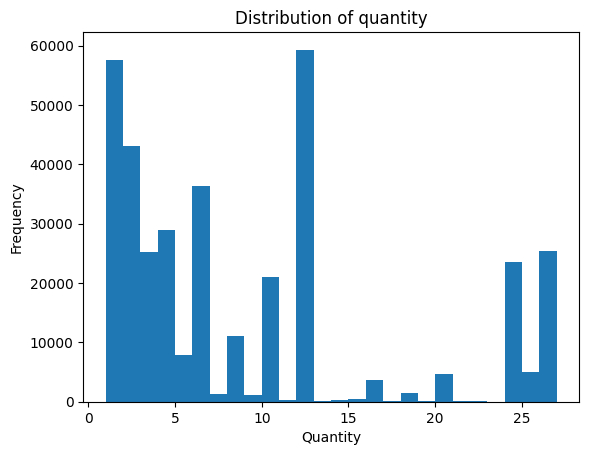

In [81]:

#HISTOGRAM
plt.hist(online_retail_cleaned['Quantity'],bins='auto')
plt.xlabel("Quantity")
plt.ylabel("Frequency")
plt.title("Distribution of quantity")

**Modes of Quantity**

- primary mode:- occur at 12 with frequency of 60000
- secondary modes at 2,3,6,10,24 and 27
- Inference:-
*  Most customers purchase around 12 units per transaction, indicating a standard/bulk buying pattern.

* Secondary modes suggest popular pack sizes or repeated ordering habits

**Spread and variability**

- data shows wide spread streatching across 0 to 27,not concentrated on one value
- Inference:-There is high variability in order sizes.

**Tail Analysis**

- the distribution features heavy tails at both ends
- inference:-Both extream small sized orders (Possible test purchases, cancellations, or minimal orders) 
and extream large  sized orders(Bulk buyers, wholesale customers, or special events) occur frequently



Text(0.5, 0, 'Quantity')

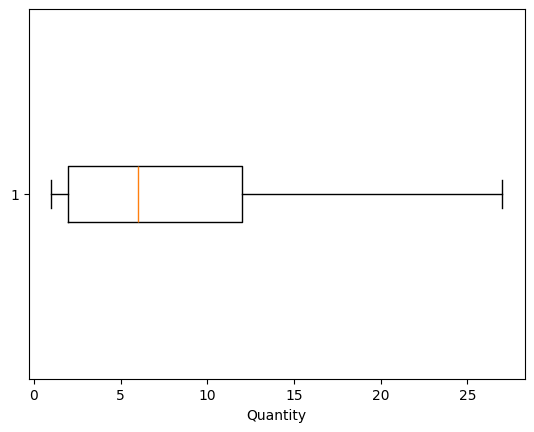

In [82]:
#BOXPLOT

plt.boxplot(online_retail_cleaned['Quantity'],vert=False,showfliers=True)
plt.xlabel("Quantity")

**Skewness Inference**

- The median line is shifted toward the left side of the box 
- Inference:-The data is Right-Skewed

**Spread Inference**
- The box (IQR) is moderately wide, and the whiskers stretch from near 0 to 27.
- Inference:-wide spread and high variability in the feature.

**Concentration Inference**

- The box covers the range from roughly 2 to 12.
- Inference:-The Middle 50% of your data is concentrated between 2 and 12 units.

In [83]:

print(online_retail_cleaned['Quantity'].mean())
print(online_retail_cleaned['Quantity'].median())

8.935046215987464
6.0


SINCE MEAN>MEDIAN RIGHT SKEWED

The quantity distribution shows a strong mode around 12 units, indicating that bulk or standard-sized orders dominate most transactions, likely reflecting common pack sizes or repeat purchasing behavior. Although the majority of orders fall between 2 and 12 units, the wide spread and right-skewed distribution reveal the presence of occasional high-quantity purchases. These large orders disproportionately influence the distribution, suggesting a distinct segment of bulk or wholesale buyers alongside regular customers.

**UnitPrice:-Price spread**



Text(0.5, 1.0, 'Unitprice Spread')

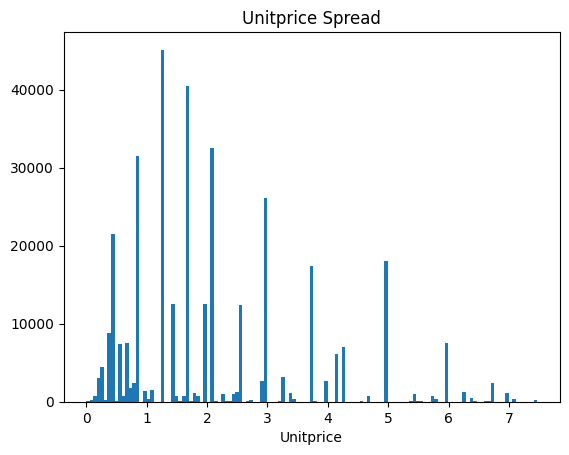

In [84]:
plt.hist(online_retail_cleaned['UnitPrice'],bins='auto')
plt.xlabel("Unitprice")
plt.title("Unitprice Spread")

The price spread shows a strong concentration at standardized low price points

**Revenue**

Text(0.5, 0, 'Revenue')

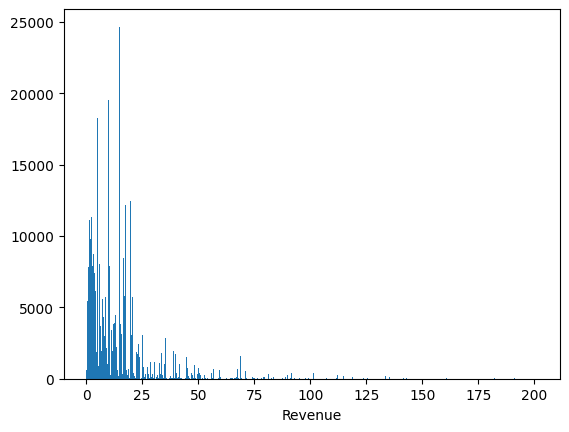

In [85]:
plt.hist(online_retail_cleaned['Revenue'],bins='auto')
plt.xlabel("Revenue")



{'whiskers': [<matplotlib.lines.Line2D at 0x2a15bd8c410>,
 'caps': [<matplotlib.lines.Line2D at 0x2a15bd8c690>,
 'boxes': [<matplotlib.lines.Line2D at 0x2a15bd8c2d0>],
 'medians': [<matplotlib.lines.Line2D at 0x2a15bd8c910>],
 'fliers': [<matplotlib.lines.Line2D at 0x2a15bd8ca50>],
 'means': []}

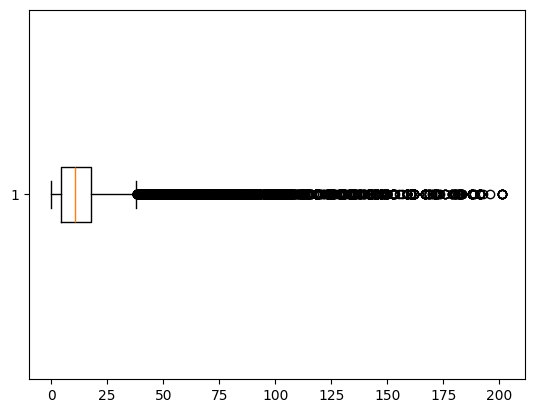

In [86]:
plt.boxplot(online_retail_cleaned['Revenue'],vert=False,showfliers=True)

#### Inference

The revenue distribution is highly right-skewed, indicating that the majority of transactions generate relatively low revenue, while a small number of high-value transactions contribute disproportionately to total revenue.

The histogram shows a clear concentration of transactions within the lower revenue ranges, suggesting that the core customer base primarily consists of small-ticket buyers. However, the presence of a long right tail highlights occasional high-value purchases, often referred to as "whale" transactions.

The boxplot further confirms this pattern, with the median positioned closer to the lower quartile and a significantly longer upper whisker. Multiple high-end outliers are observed beyond the upper whisker

**Holiday Demand**

Text(0.5, 0, 'HolidayQuantity')

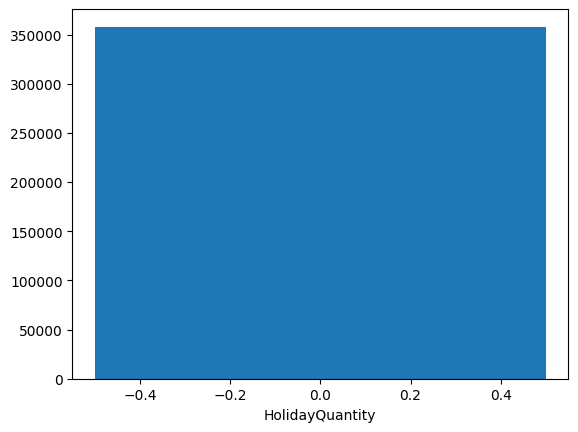

In [87]:
plt.hist(online_retail_cleaned['HolidayQuantity'],bins='auto')
plt.xlabel("HolidayQuantity")

In [88]:

print(online_retail_cleaned['HolidayQuantity'].value_counts())



HolidayQuantity
0    357993
Name: count, dtype: int64


No transactions occurred on recognized public holidays within the dataset time window, resulting in zero holiday-related sales volume.

In [89]:
online_retail_cleaned.drop(columns=['HolidayQuantity'],inplace=True)



In [90]:
online_retail_cleaned.to_csv('clean_online_retail_final.csv', index=False)

In [91]:
online_retail_cleaned.columns

Index(['InvoiceNo', 'StockCode', 'Description', 'Quantity', 'InvoiceDate',
       'UnitPrice', 'CustomerID', 'Country', 'Revenue', 'Year', 'Month_num',
       'day_of_week', 'week', 'CohortMonth', 'date', 'countryorregion',
       'holidayname', 'month', 'is_weekend', 'month_end', 'month_start',
       'isholiday', 'YearMonth'],
      dtype='object')

### 3 Time-Based Sales Trends

**Monthly revenue trend**

In [92]:
import seaborn as sns

<function matplotlib.pyplot.show(close=None, block=None)>

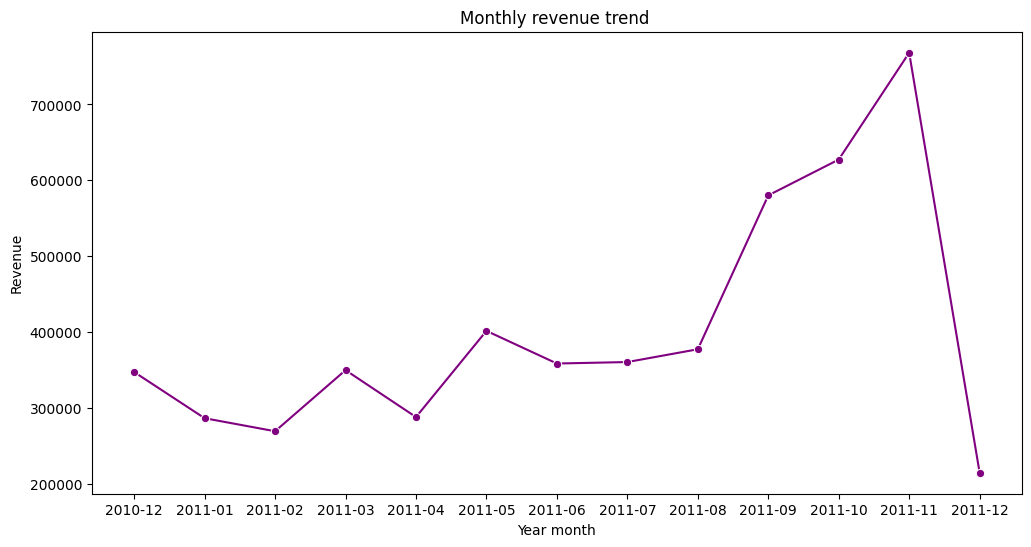

In [93]:
monthly_revenue=online_retail_cleaned.groupby('YearMonth')['Revenue'].sum()
plt.figure(figsize=(12,6))
sns.lineplot(x=monthly_revenue.index,y=monthly_revenue.values,marker='o',color='purple')
plt.title("Monthly revenue trend ")
plt.xlabel('Year month')
plt.ylabel("Revenue")
plt.show

Observation:
Revenue dips initially from Dec 2010 to Feb 2011, then gradually rises from Mar to Aug 2011.

Sharp spikes in Sep-Nov 2011, peaking in Nov 2011.

Dec 2011 shows a sudden drop.

**Monthly Quantity trend**

In [94]:
online_retail_cleaned.columns

Index(['InvoiceNo', 'StockCode', 'Description', 'Quantity', 'InvoiceDate',
       'UnitPrice', 'CustomerID', 'Country', 'Revenue', 'Year', 'Month_num',
       'day_of_week', 'week', 'CohortMonth', 'date', 'countryorregion',
       'holidayname', 'month', 'is_weekend', 'month_end', 'month_start',
       'isholiday', 'YearMonth'],
      dtype='object')

Text(0.5, 1.0, 'Monthly Quantity Trend')

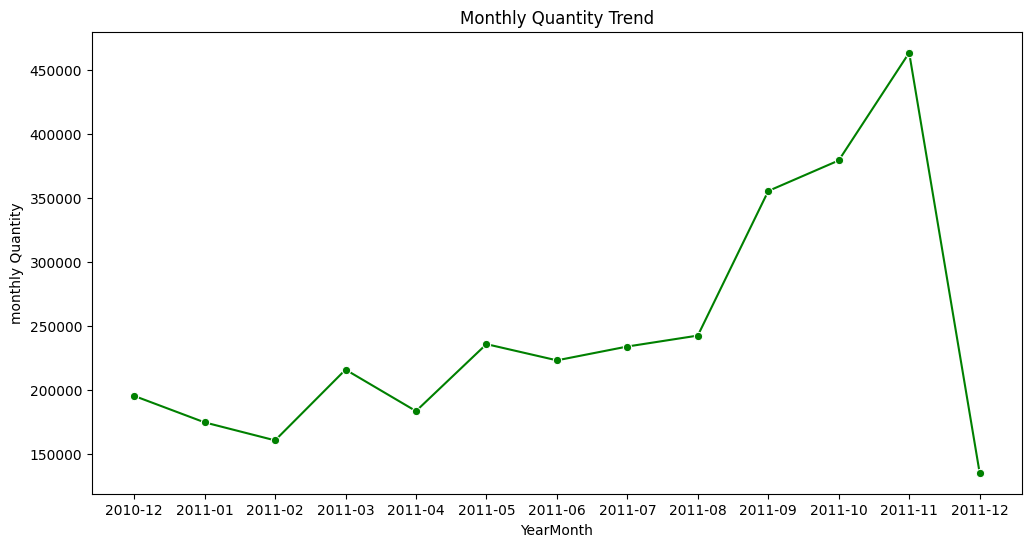

In [95]:
plt.figure(figsize=(12,6))
monthly_quantity=online_retail_cleaned.groupby('YearMonth')['Quantity'].sum()
sns.lineplot(x=monthly_quantity.index,y=monthly_quantity.values,marker='o',color='green')
plt.xlabel('YearMonth')
plt.ylabel("monthly Quantity")
plt.title('Monthly Quantity Trend')

Observation:

Quantity sold follows a pattern similar to revenue.

Gradual increase from Mar to Aug 2011.

Big jump in Sep–Nov 2011, peaking in Nov.

Dec 2011 again drops sharply.

Monthly revenue and monthly quantity trends closely mirror each other

In [96]:
online_retail_cleaned['week'].values

array([ 3, 49, 49, ..., 43, 43, 43], shape=(357993,))

**Weekly sales behavior**

Text(0.5, 1.0, 'Weekly Sales Behavior')

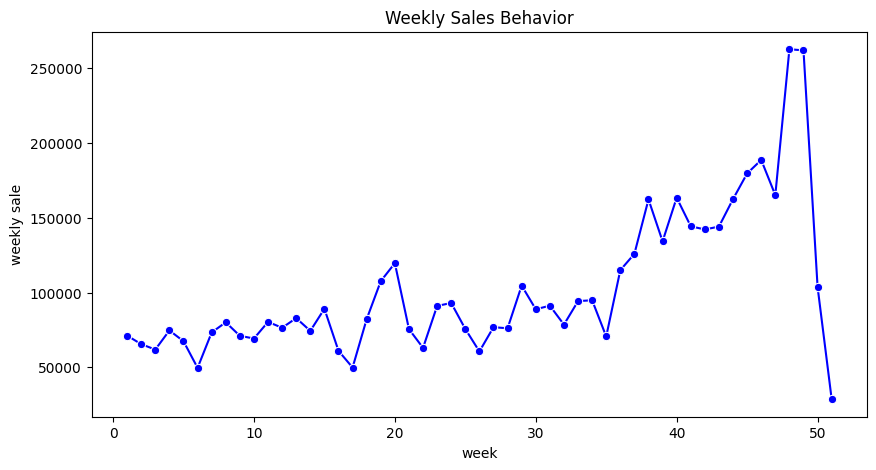

In [97]:
plt.figure(figsize=(10,5))
weekly_sales=online_retail_cleaned.groupby('week')['Revenue'].sum()
sns.lineplot(x=weekly_sales.index,y=weekly_sales.values,marker='o',color='blue')
plt.xlabel('week')
plt.ylabel("weekly sale")
plt.title('Weekly Sales Behavior')

In [98]:
online_retail_cleaned['day_of_week'].values


array([1, 1, 1, ..., 4, 4, 4], shape=(357993,))

In [99]:
online_retail_cleaned['day_of_week'].unique()

array([1, 2, 3, 0, 6, 4])

In [100]:
day_map={0:'Monday',1:'Tuesday',2:'Wednesday',3:'Thursday',4:'Friday',5:'Saturday',6:'Sunday'}

In [101]:
online_retail_cleaned['day_of_week_str']=online_retail_cleaned['day_of_week'].map(day_map)

In [102]:
online_retail_cleaned['day_of_week_str']

0           Tuesday
1           Tuesday
2           Tuesday
3           Tuesday
4           Tuesday
            ...    
357988    Wednesday
357989    Wednesday
357990       Friday
357991       Friday
357992       Friday
Name: day_of_week_str, Length: 357993, dtype: object

**Day-of-week sales**

In [ ]:

day_of_week_sales=online_retail_cleaned.groupby('day_of_week_str')['Revenue'].sum()
day_of_week_sales_df = day_of_week_sales.reset_index()
day_of_week_sales_df.columns=['Days','Revenue']

<Figure size 1000x500 with 0 Axes>

C:\Users\meena\AppData\Local\Temp\ipykernel_4416\1828299943.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=day_of_week_sales_df,x='Days',y='Revenue',palette='viridis')


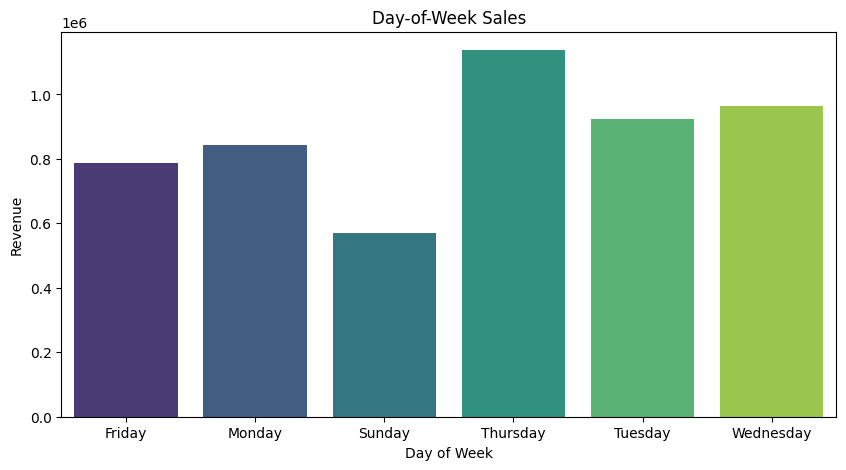

In [111]:
plt.figure(figsize=(10,5))
sns.barplot(data=day_of_week_sales_df,x='Days',y='Revenue',palette='viridis')

plt.title('Day-of-Week Sales')
plt.ylabel('Revenue')
plt.xlabel('Day of Week')
plt.show()


In [106]:
day_of_week_sales_df

,Days,Revenue
0,Friday,786106.131
1,Monday,842114.901
2,Sunday,571113.811
3,Thursday,1137655.600
4,Tuesday,924979.741
5,Wednesday,964803.420


### 4. Product Performance Analysis

**Top 10 products by revenue**

In [112]:
online_retail_cleaned.columns

Index(['InvoiceNo', 'StockCode', 'Description', 'Quantity', 'InvoiceDate',
       'UnitPrice', 'CustomerID', 'Country', 'Revenue', 'Year', 'Month_num',
       'day_of_week', 'week', 'CohortMonth', 'date', 'countryorregion',
       'holidayname', 'month', 'is_weekend', 'month_end', 'month_start',
       'isholiday', 'YearMonth', 'day_of_week_str'],
      dtype='object')

In [121]:
top_products=online_retail_cleaned.groupby('Description')['Revenue'].sum()
top_products=top_products.sort_values(ascending=False)
top_10_products=top_products.head(10)
top_10_products_df=top_10_products.reset_index()
top_10_products_df.columns=["Product",'Revenue']




In [ ]:
top_10_products_df

,Product,Revenue
0,white hanging heart tlight holder,55914.18
1,party bunting,48219.30
2,jumbo bag red retrospot,39127.39
3,assorted colour bird ornament,33952.01
4,spotty bunting,28135.45
5,chilli lights,27273.33
6,paper chain kit 50s christmas,27018.84
7,jam making set with jars,25847.67
8,set of 3 cake tins pantry design,24263.53
9,hot water bottle keep calm,21513.75


C:\Users\meena\AppData\Local\Temp\ipykernel_4416\1720311237.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=top_10_products_df,x='Product',y="Revenue",palette='viridis')


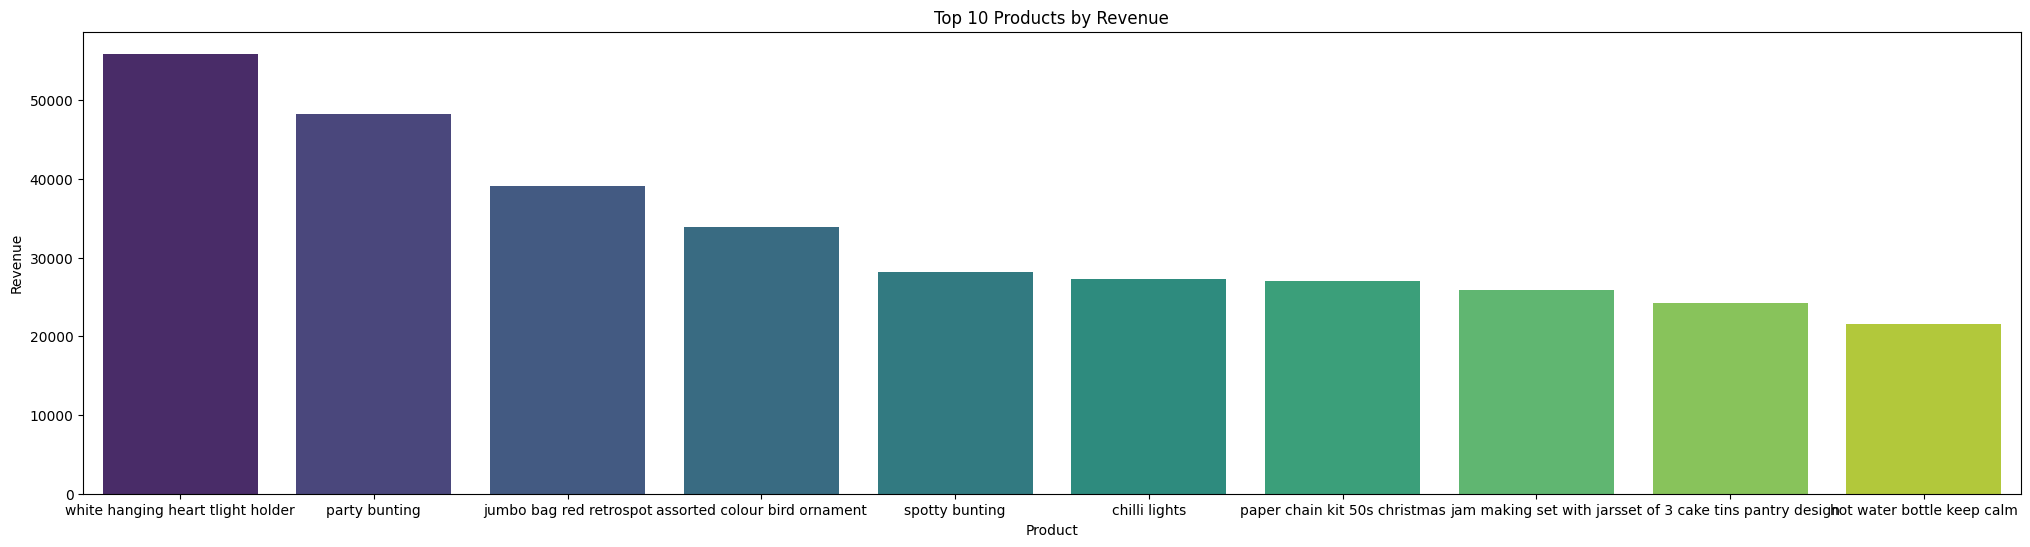

In [134]:
plt.figure(figsize=(25,6))
sns.barplot(data=top_10_products_df,x='Product',y="Revenue",palette='viridis')
plt.xlabel('Product')
plt.ylabel('Revenue')
plt.title('Top 10 Products by Revenue')
plt.show()

Question	Plot
Top 10 products by revenue	Bar
Top 10 by quantity	Bar
Price vs quantity	Scatter
Revenue concentration	Pareto-style bar

In [130]:
online_retail_cleaned.columns

Index(['InvoiceNo', 'StockCode', 'Description', 'Quantity', 'InvoiceDate',
       'UnitPrice', 'CustomerID', 'Country', 'Revenue', 'Year', 'Month_num',
       'day_of_week', 'week', 'CohortMonth', 'date', 'countryorregion',
       'holidayname', 'month', 'is_weekend', 'month_end', 'month_start',
       'isholiday', 'YearMonth', 'day_of_week_str'],
      dtype='object')

**Top 10 by quantity**

In [136]:
top_product_by_quantity=online_retail_cleaned.groupby('Description')['Quantity'].sum()
top_product_by_quantity=top_product_by_quantity.sort_values(ascending=False)
top_10_product_by_quantity_df=top_product_by_quantity.head(10).reset_index()
top_10_product_by_quantity_df.columns=['Product','Quantity']


C:\Users\meena\AppData\Local\Temp\ipykernel_4416\282874804.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=top_10_product_by_quantity_df,x='Product',y='Quantity',palette='viridis')


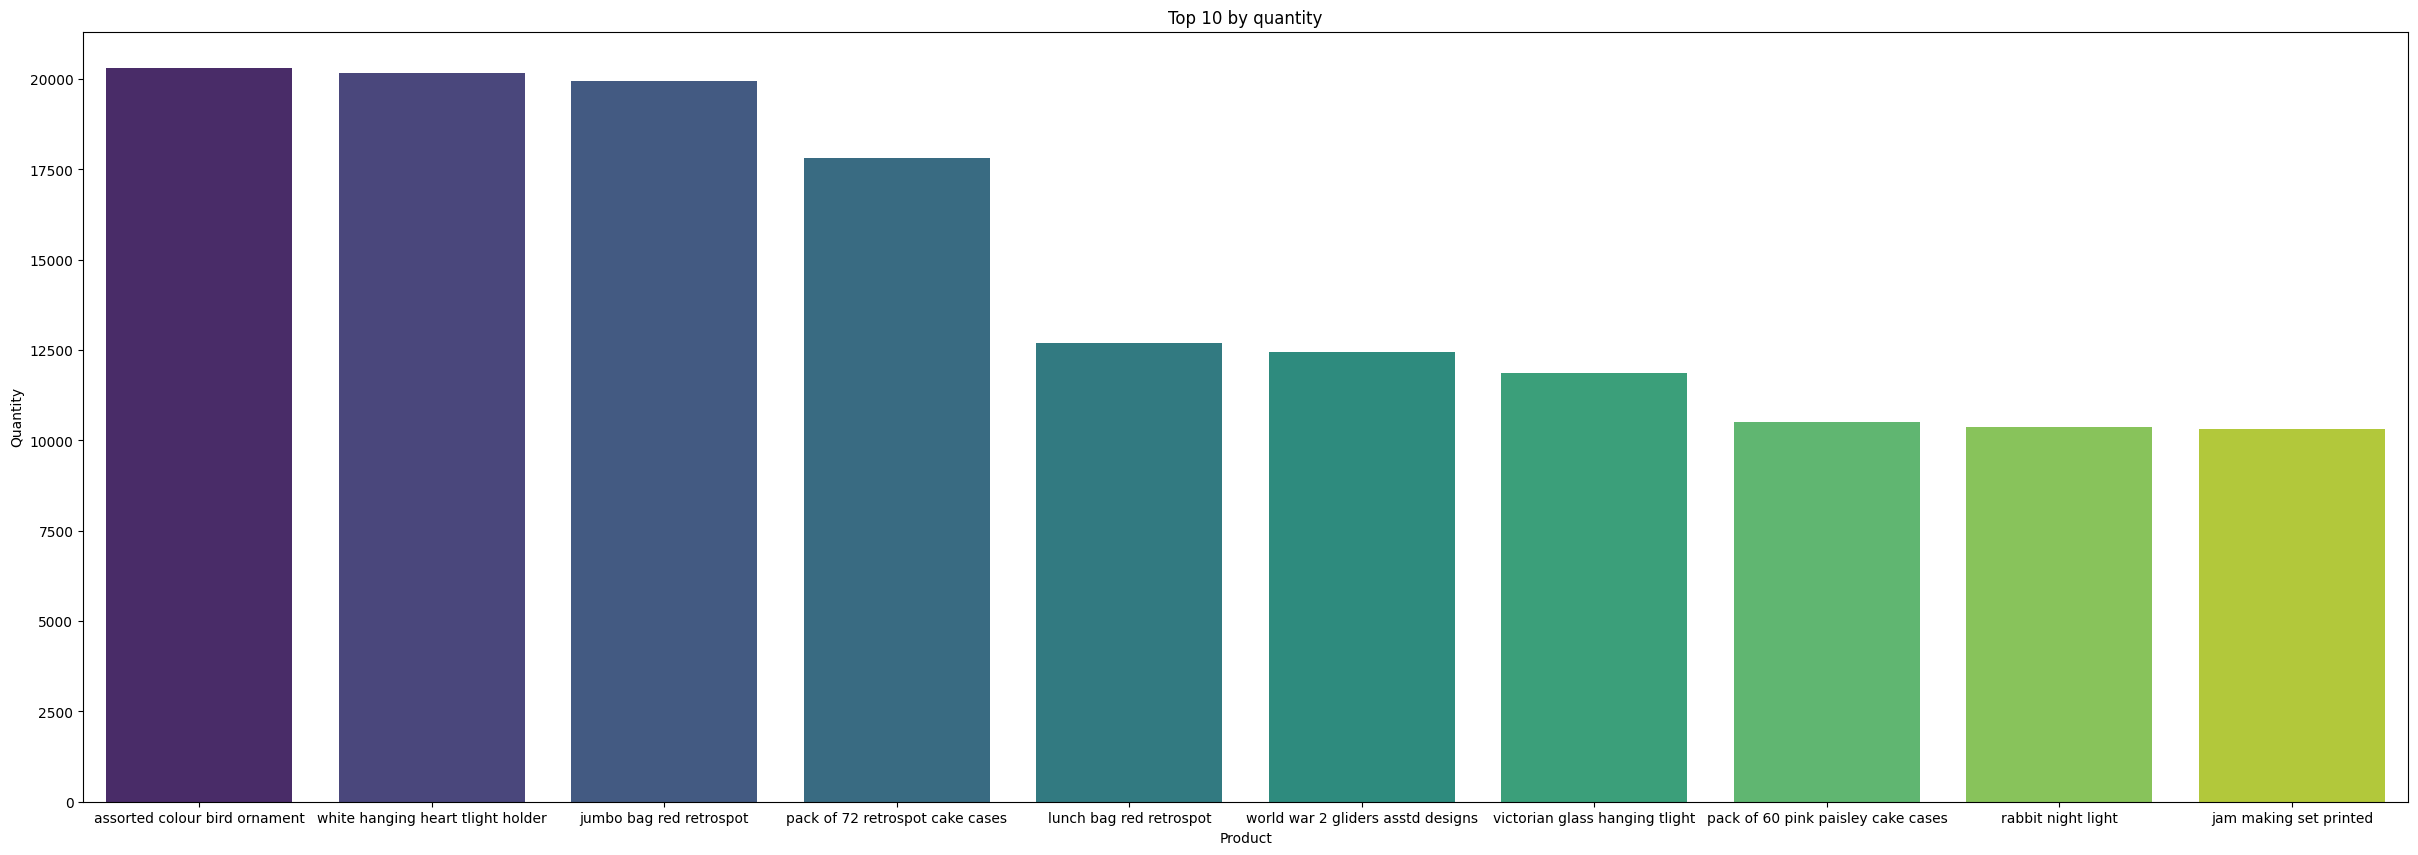

In [139]:
plt.figure(figsize=(30,10))
sns.barplot(data=top_10_product_by_quantity_df,x='Product',y='Quantity',palette='viridis')
plt.xlabel('Product')
plt.ylabel('Quantity')
plt.title('Top 10 by quantity')
plt.show()

**Price vs quantity**

Text(0.5, 1.0, 'Price vs quantity')

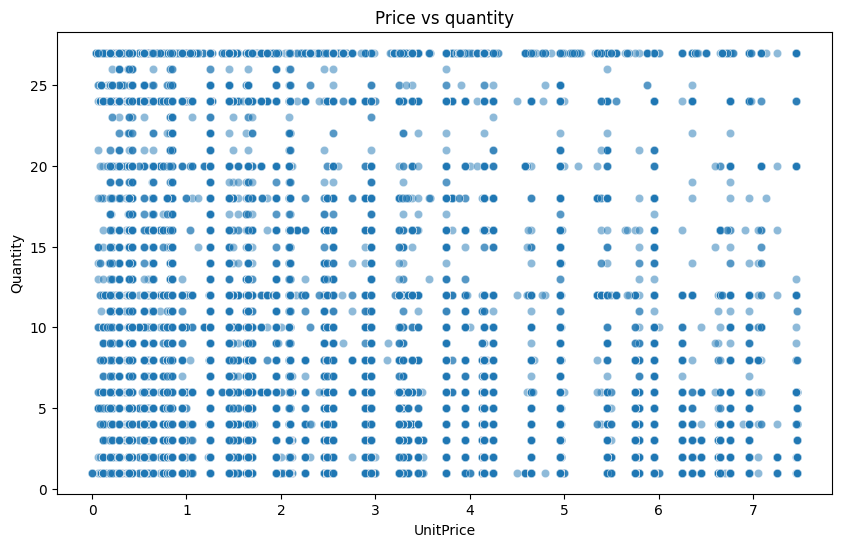

In [143]:
plt.figure(figsize=(10,6))
sns.scatterplot(data=online_retail_cleaned,x='UnitPrice',y='Quantity',alpha=0.5)
plt.title('Price vs quantity')

### 5. Customer Purchasing Behavior

**Orders per Customer**

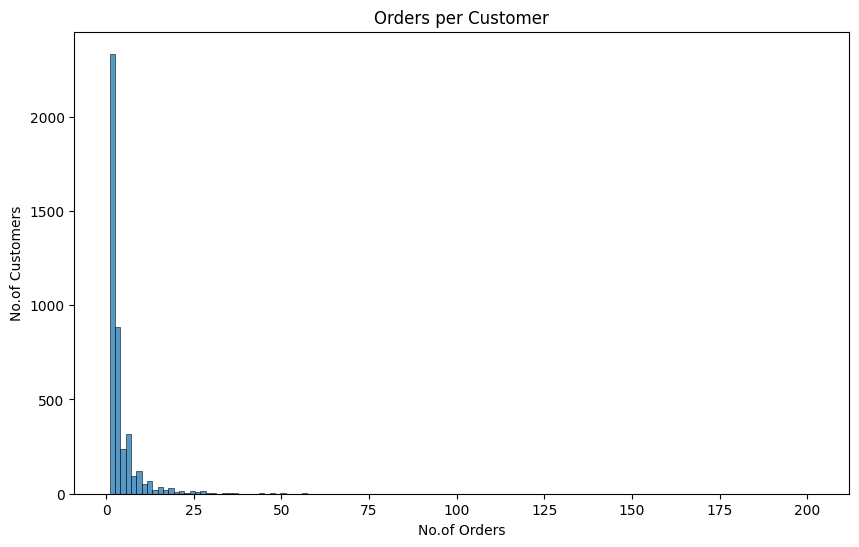

In [144]:
order_per_customer=online_retail_cleaned.groupby('CustomerID')['InvoiceNo'].nunique()
plt.figure(figsize=(10,6))
sns.histplot(x=order_per_customer,bins='auto')
plt.xlabel("No.of Orders")
plt.ylabel("No.of Customers")
plt.title('Orders per Customer')
plt.show()


Customer engagement is heavily right-skewed, indicating retention opportunities.

**Revenue per Customer**

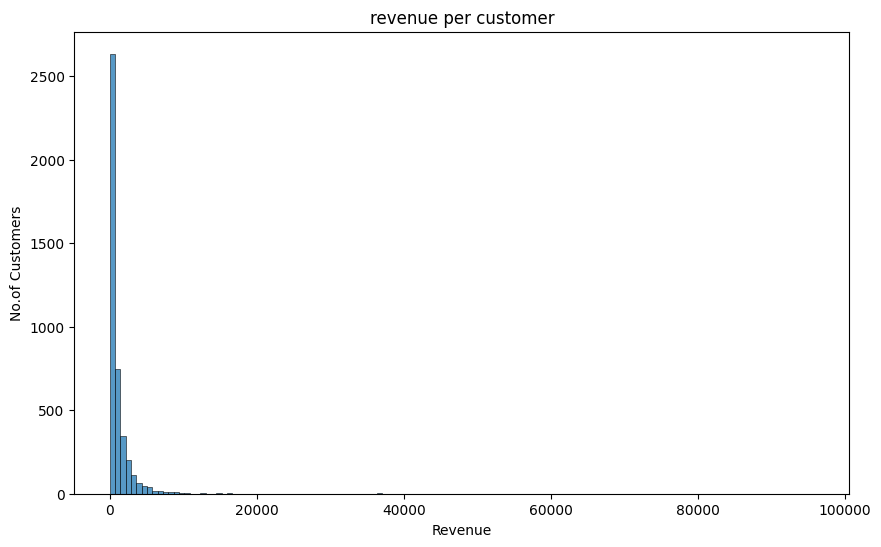

In [147]:
revenue_per_customer=online_retail_cleaned.groupby('CustomerID')['Revenue'].sum()
plt.figure(figsize=(10,6))
sns.histplot(x=revenue_per_customer,bins='auto')
plt.xlabel('Revenue')
plt.ylabel('No.of Customers')
plt.title("revenue per customer")
plt.show()


Revenue distribution is highly right-skewed.

A small fraction of customers contributes a disproportionate share of revenue.

**Orders vs Revenue**

Text(0.5, 1.0, 'Orders vs Revenue')

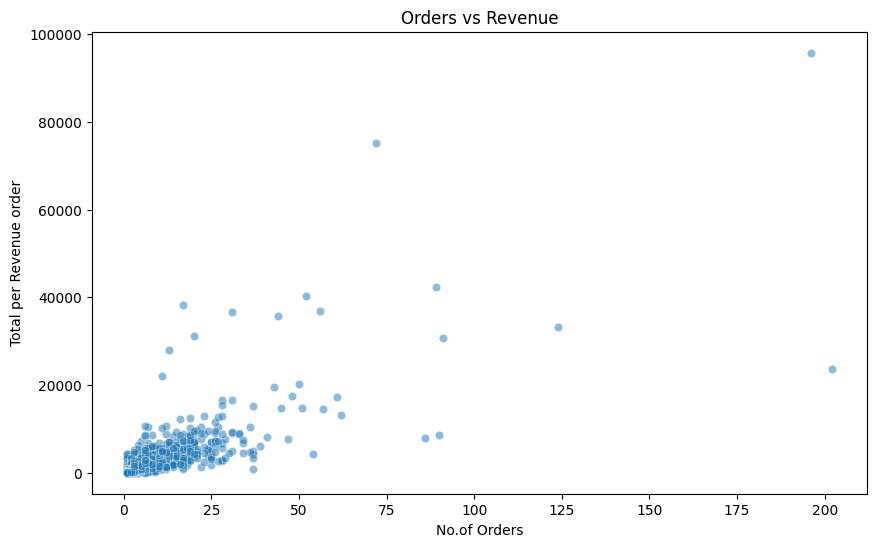

In [148]:
customer_summary=online_retail_cleaned.groupby('CustomerID').agg(
    Orders=('InvoiceNo','nunique'),
    revenue=('Revenue','sum')
).reset_index()

plt.figure(figsize=(10,6))
sns.scatterplot(data=customer_summary,x='Orders',y='revenue',alpha=0.5)
plt.xlabel('No.of Orders')
plt.ylabel('Total per Revenue order')
plt.title("Orders vs Revenue")

Some customers place many low-value orders.

Others place few but high-value orders.